**(0) 문제정의**  
날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  --> 다변수 선형회귀  
시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제

사이킷런(sklearn)의 LinearRegression

**(1) 데이터 가져오기**

In [125]:
# 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

In [126]:
# Below are the quick examples 

# Example 1: Using dt accessor to extract day               
train["datetime"]= pd.to_datetime(train[ "datetime"])

train['year']=train[ "datetime"].dt.year
train['month']=train[ "datetime"].dt.month
train['day']=train[ "datetime"].dt.day
train['hour']=train[ "datetime"].dt.hour
train['minute']=train[ "datetime"].dt.minute
train['second']=train[ "datetime"].dt.second 


train



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


**(3) year, month, day, hour, minute, second 데이터 개수 시각화하기**

In [127]:
#sns.countplot 활용해서 시각화하기
#subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt


**(4) X, y 컬럼 선택 및 train/test 데이터 분리**

In [136]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 
# 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.
# 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.
# ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
#  x(독립변수),y(종속변수) 및 train, test 데이터 분리

#season	holiday	workingday	weather	temp	atemp	humidity	windspeed	casual	registered	count	year	month	day	hour	minute	second

X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
          'humidity', 'windspeed', 'month', 'hour']].values


# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
y = train['count'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**(5) LinearRegression 모델 학습**

In [137]:
from sklearn.linear_model import LinearRegression

# 모델준비
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

**(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산**

In [138]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기

predictions = model.predict(X_test)
predictions

array([293.76286852,   7.11354747, 239.69517747, ..., 271.69335949,
        -6.37796452, 203.8627153 ])

In [139]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기

y_test_cp = y_test.copy()

y_test_cp - predictions



array([-166.76286852,    5.88645253,  -76.69517747, ...,  237.30664051,
         11.37796452,   35.1372847 ])

In [140]:
# mse 값과 함께 rmse 값도 계산하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


21660.424724020315

In [141]:

rmse = np.sqrt(mse) 
rmse

147.17481008657805

**(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기**

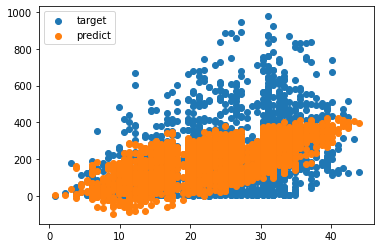

In [142]:
import matplotlib.pyplot as plt

#시각화

# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 5], y_test, label="target")
plt.scatter(X_test[:, 5], predictions, label="predict")
plt.legend()
plt.show()


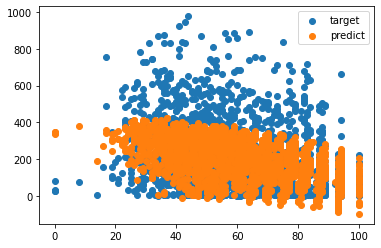

In [143]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

plt.scatter(X_test[:, 6], y_test, label="target")
plt.scatter(X_test[:, 6], predictions, label="predict")
plt.legend()
plt.show()